In [1]:
!pip install langchain_community langchain langchain-openai openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 942.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.6/396.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/1

#JSON to SQL:

In [ ]:
import getpass
import os

if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

Enter your OpenAI API key: ··········


In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0.7)

In [ ]:
from pydantic import BaseModel, Field

class JsonToSQLSchema(BaseModel):
    json_input: str = Field(..., description="The input JSON string containing the data structure to be converted into SQL.")
    sql_dbms: str = Field(..., description="The type of SQL DBMS for which the SQL script will be generated (e.g., MySQL, PostgreSQL, SQLite).")

In [ ]:
from langchain_core.prompts import PromptTemplate

def convert_json_to_sql_schema(input: JsonToSQLSchema):

  prompt_txt = """
  You are a database schema generation expert. Please analyze the following JSON input and generate the corresponding SQL schema for the specified DBMS.

  1. Ensure that all tables have a primary key, specifically an `id` field, and define appropriate foreign key relationships if there are nested objects or arrays in the JSON.
  2. Generate SQL based on the specific DBMS mentioned, following the syntax and constraints for the specified DBMS (e.g., MySQL, PostgreSQL, SQLite).

  JSON Input:
  {json_input}

  SQL DBMS:
  {sql_dbms}

  Provide a well-formatted SQL script that is ready to be executed in the specified DBMS.
  Only provide the SQL script, nothing else.
  """

  prompt_template = PromptTemplate(
      template=prompt_txt,
      input_variables=["json_input", "sql_dbms"]
  )

  chain = prompt_template | llm
  result = chain.invoke({"json_input": input.json_input, "sql_dbms": input.sql_dbms})
  return result

In [ ]:
schema_instance = JsonToSQLSchema(
  json_input='{"store":{"name":"Super Tienda","location":{"address":"Av. Siempre Viva 123","city":"Ciudad Central","postal_code":"12345"},"employees":[{"name":"Carlos Gómez","position":"Gerente","years_at_store":5},{"name":"Ana Martínez","position":"Cajera","years_at_store":2}],"inventory":[{"item_id":1,"item_name":"Café","category":"Bebidas","price":3.50,"stock":120},{"item_id":2,"item_name":"Pan Integral","category":"Panadería","price":2.00,"stock":60},{"item_id":3,"item_name":"Manzana","category":"Frutas","price":1.00,"stock":200}]}}',
  sql_dbms='MySQL'
)

In [ ]:
result = convert_json_to_sql_schema(schema_instance)

In [ ]:
result.content

'```sql\nCREATE TABLE Store (\n    id INT AUTO_INCREMENT PRIMARY KEY,\n    name VARCHAR(255) NOT NULL,\n    address VARCHAR(255) NOT NULL,\n    city VARCHAR(255) NOT NULL,\n    postal_code VARCHAR(20) NOT NULL\n);\n\nCREATE TABLE Employee (\n    id INT AUTO_INCREMENT PRIMARY KEY,\n    store_id INT NOT NULL,\n    name VARCHAR(255) NOT NULL,\n    position VARCHAR(255) NOT NULL,\n    years_at_store INT NOT NULL,\n    FOREIGN KEY (store_id) REFERENCES Store(id) ON DELETE CASCADE\n);\n\nCREATE TABLE Inventory (\n    id INT AUTO_INCREMENT PRIMARY KEY,\n    store_id INT NOT NULL,\n    item_id INT NOT NULL,\n    item_name VARCHAR(255) NOT NULL,\n    category VARCHAR(255) NOT NULL,\n    price DECIMAL(10, 2) NOT NULL,\n    stock INT NOT NULL,\n    FOREIGN KEY (store_id) REFERENCES Store(id) ON DELETE CASCADE\n);\n```'

#XML to SQL

In [ ]:
from pydantic import BaseModel, Field

class XmlToSQLSchema(BaseModel):
    xml_input: str = Field(..., description="The input XML string containing the data structure to be converted into SQL.")
    sql_dbms: str = Field(..., description="The type of SQL DBMS for which the SQL script will be generated (e.g., MySQL, PostgreSQL, SQLite).")

In [ ]:
from langchain_core.prompts import PromptTemplate

def convert_xml_to_sql_schema(input: XmlToSQLSchema):

  prompt_txt = """
  You are a database schema generation expert. Please analyze the following XML input and generate the corresponding SQL schema for the specified DBMS.

  1. Ensure that all tables have a primary key, specifically an `id` field, and define appropriate foreign key relationships if there are nested elements or collections in the XML.
  2. Generate SQL based on the specific DBMS mentioned, following the syntax and constraints for the specified DBMS (e.g., MySQL, PostgreSQL, SQLite).

  XML Input:
  {xml_input}

  SQL DBMS:
  {sql_dbms}

  Provide a well-formatted SQL script that is ready to be executed in the specified DBMS.
  Only provide the SQL script, nothing else.
  """

  prompt_template = PromptTemplate(
      template=prompt_txt,
      input_variables=["xml_input", "sql_dbms"]
  )

  chain = prompt_template | llm
  result = chain.invoke({"xml_input": input.xml_input, "sql_dbms": input.sql_dbms})
  return result

In [ ]:
schema_instance = XmlToSQLSchema(
  xml_input='<store><name>Super Tienda</name><location><address>Av. Siempre Viva 123</address><city>Ciudad Central</city><postal_code>12345</postal_code></location><employees><employee><name>Carlos Gómez</name><position>Gerente</position><years_at_store>5</years_at_store></employee><employee><name>Ana Martínez</name><position>Cajera</position><years_at_store>2</years_at_store></employee></employees><inventory><item><item_id>1</item_id><item_name>Café</item_name><category>Bebidas</category><price>3.50</price><stock>120</stock></item><item><item_id>2</item_id><item_name>Pan Integral</item_name><category>Panadería</category><price>2.00</price><stock>60</stock></item><item><item_id>3</item_id><item_name>Manzana</item_name><category>Frutas</category><price>1.00</price><stock>200</stock></item></inventory></store>',
  sql_dbms='MySQL'
)

In [ ]:
result2 = convert_xml_to_sql_schema(schema_instance)

In [ ]:
result2.content

'```sql\nCREATE TABLE store (\n    id INT AUTO_INCREMENT PRIMARY KEY,\n    name VARCHAR(255) NOT NULL\n);\n\nCREATE TABLE location (\n    id INT AUTO_INCREMENT PRIMARY KEY,\n    store_id INT,\n    address VARCHAR(255) NOT NULL,\n    city VARCHAR(100) NOT NULL,\n    postal_code VARCHAR(20) NOT NULL,\n    FOREIGN KEY (store_id) REFERENCES store(id) ON DELETE CASCADE\n);\n\nCREATE TABLE employee (\n    id INT AUTO_INCREMENT PRIMARY KEY,\n    store_id INT,\n    name VARCHAR(255) NOT NULL,\n    position VARCHAR(100) NOT NULL,\n    years_at_store INT NOT NULL,\n    FOREIGN KEY (store_id) REFERENCES store(id) ON DELETE CASCADE\n);\n\nCREATE TABLE item (\n    id INT AUTO_INCREMENT PRIMARY KEY,\n    store_id INT,\n    item_id INT NOT NULL,\n    item_name VARCHAR(255) NOT NULL,\n    category VARCHAR(100) NOT NULL,\n    price DECIMAL(10, 2) NOT NULL,\n    stock INT NOT NULL,\n    FOREIGN KEY (store_id) REFERENCES store(id) ON DELETE CASCADE,\n    UNIQUE (item_id) -- Assuming item_id should be uni

#Math formulas in LaTeX

In [ ]:
class FormulaToLatexSchema(BaseModel):
    formula_input: str = Field(..., description="The input string containing the mathematical formula to be converted into LaTeX.")

In [ ]:
def convert_formula_to_latex(input: FormulaToLatexSchema):
    prompt_txt = """
    You are a mathematical expert. Please analyze the following mathematical formula input and convert it into a well-formatted LaTeX equation.

    Formula Input:
    {formula_input}

    Provide only the LaTeX code, nothing else.
    """

    prompt_template = PromptTemplate(
        template=prompt_txt,
        input_variables=["formula_input"]
    )

    chain = prompt_template | llm
    result = chain.invoke({"formula_input": input.formula_input})

    return result

In [ ]:
schema_instance = FormulaToLatexSchema(
    formula_input="integral of x squared dx from 0 to 1"
)

In [ ]:
result3 = convert_formula_to_latex(schema_instance)

In [ ]:
print(result3.content)

```latex
\int_{0}^{1} x^2 \, dx
```


#Translator

In [ ]:
class TranslationSchema(BaseModel):
    text_input: str = Field(..., description="The input string containing the text to be translated.")
    source_language: str = Field(..., description="The source language of the text (e.g., English, Spanish).")
    target_language: str = Field(..., description="The target language for the translation (e.g., French, German).")

In [ ]:
def translate_text(input: TranslationSchema):
    prompt_txt = """
    You are a language expert. Please translate the following text from {source_language} to {target_language}.

    Text to translate:
    {text_input}

    Provide only the translated text, nothing else.
    """

    prompt_template = PromptTemplate(
        template=prompt_txt,
        input_variables=["text_input", "source_language", "target_language"]
    )

    chain = prompt_template | llm
    result = chain.invoke({
        "text_input": input.text_input,
        "source_language": input.source_language,
        "target_language": input.target_language
    })

    return result

In [ ]:
schema_instance = TranslationSchema(
    text_input="Hello, how are you?",
    source_language="English",
    target_language="Spanish"
)

In [ ]:
result_translation = translate_text(schema_instance)

In [ ]:
result_translation.content

'Hola, ¿cómo estás?'

#Text to conceptual table

In [ ]:
class InfoToTableSchema(BaseModel):
    text_input: str = Field(..., description="The input string containing the information to be converted into table format.")
    context: str = Field(..., description="Additional context about the type of table or fields to extract, if necessary.")

In [ ]:
def convert_info_to_conceptual_table(input: InfoToTableSchema):
    prompt_txt = """
    You are an expert in organizing information into clear and concise tables. Please analyze the following paragraph and extract key concepts, organizing them into a well-structured table format.

    1. Create appropriate column headers based on the concepts presented in the text.
    2. Organize the information into rows, grouping similar ideas together for clarity.

    Paragraph:
    {text_input}

    Context (if any):
    {context}

    Provide only the table structure in text format, nothing else.
    """

    prompt_template = PromptTemplate(
        template=prompt_txt,
        input_variables=["text_input", "context"]
    )

    chain = prompt_template | llm
    result = chain.invoke({
        "text_input": input.text_input,
        "context": input.context
    })

    return result

In [ ]:
schema_instance = InfoToTableSchema(
    text_input="There are various types of language models. First, we have rule-based models, which rely on manually crafted rules for text generation. Then, there are statistical models, which use probabilities to predict the next word. Neural network-based models like GPT are the most advanced, learning from large datasets to generate human-like text.",
    context="Types of Language Models"
)

In [ ]:
result_table = convert_info_to_conceptual_table(schema_instance)

In [ ]:
result_table.content

'| Type of Language Model        | Description                                                   |\n|-------------------------------|---------------------------------------------------------------|\n| Rule-based Models             | Rely on manually crafted rules for text generation            |\n| Statistical Models            | Use probabilities to predict the next word                   |\n| Neural Network-based Models    | Learn from large datasets to generate human-like text        |'

#Image Transcription

In [2]:
!pip install langchain-google-genai

In [3]:
import os
from google.colab import userdata

if "GOOGLE_API_KEY" not in os.environ:
  os.environ['GOOGLE_API_KEY'] = userdata.get("GOOGLE_API_KEY")

In [6]:
import requests

image_url = "https://i1.rgstatic.net/publication/380642269_Large_language_models_in_complex_system_design/links/6647668bbc86444c72e603ef/largepreview.png"
content = requests.get(image_url).content

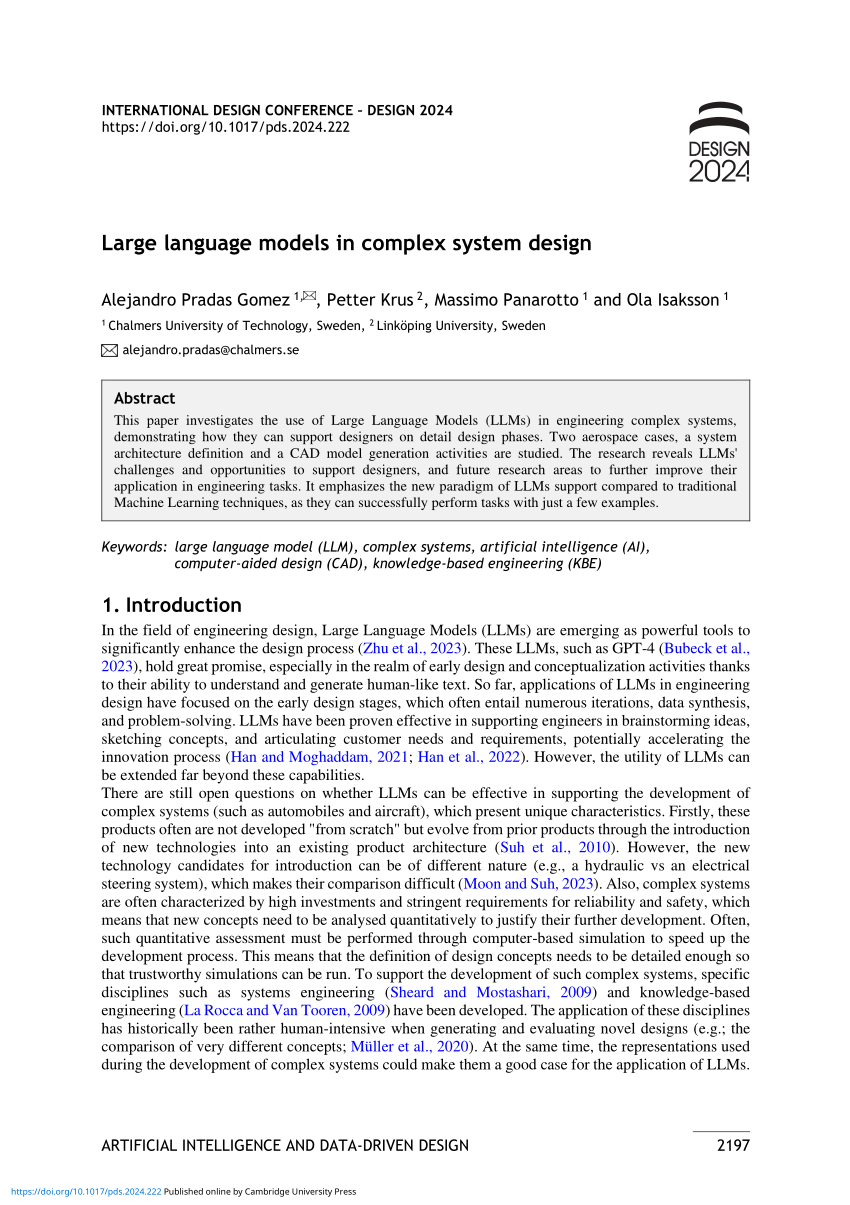

In [7]:
from IPython.display import Image
Image(content)

In [8]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [9]:
from langchain_core.messages import HumanMessage

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Give me the text transcript of what you see in the image",
        },
        {"type": "image_url", "image_url": image_url},
    ]
)
response = llm.invoke([message]).content

In [10]:
response

'## Large language models in complex system design\n\n**Alejandro Pradas Gomez** <sup>1</sup>, **Petter Krus** <sup>2</sup>, **Massimo Panarotto** <sup>1</sup> and **Ola Isaksson** <sup>1</sup>\n\n<sup>1</sup> Chalmers University of Technology, Sweden, <sup>2</sup> Linköping University, Sweden\n\nalejandro.pradas@chalmers.se\n\n**Abstract**\n\nThis paper investigates the use of Large Language Models (LLMs) in engineering complex systems, demonstrating how they can support designers on detail design phases. Two aerospace cases, a system architecture definition and a CAD model generation activities are studied. The research reveals LLMs\' challenges and opportunities to support designers, and future research areas to further improve their application in engineering tasks. It emphasizes the new paradigm of LLMs support compared to traditional Machine Learning techniques, as they can successfully perform tasks with just a few examples.\n\n**Keywords:** large language model (LLM), complex s